# Foundations of Data Science
## Homework 5: Algorithmic fairness

Student Name: Pranjal Jain
Net ID: pj2069

***

### Part 1: Algorithmic fairness (15 points)


#### Data acquisition and preparation (4 points)

For this question we will use the "Adult" dataset from the UC Irvine repository.

This data is from the United States census, and we will examine the algorithmic fairness for an income prediction task. For more information about the dataset, see [Here](https://archive.ics.uci.edu/ml/datasets/adult).


1\. Download the data. (1 point)

Load data from the URL using the pandas read_csv method.

In [ ]:
#Place code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',  header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


2\. If the column headers are not correct, assign names to them (hint: use the readme from the source website). Compute descriptive statistics for the education level. (2 points).

In [ ]:
#Place code here

columnNames = [
                'age', 'workclass', 'fnlwgt', 'education',
               'education-num', 'marital-status', 'occupation',
               'relationship', 'race', 'sex', 'capital-gain',
               'capital-loss', 'hours-per-week', 'native-country', 'Salary'
               ]

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',  header=None, names = columnNames)
df = df.dropna()

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df['education-num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

3\. Select one attribute as protected. Explain the reason why you selected this attribute. (1 point)

Protected attributes require the prefix protected. The outcome attribute requires the prefix target. For example, if you need to measure fairness rankings of a dataset with the columns sex and credit_score, rename the columns to protected_sex and target_credit_Score. Update the column names for our dataset (hint: you may also have to convert the target to a binary variable and create dummy variables for those that are categorical, for upcoming steps). (1 point).

In [ ]:
#Place code here

'''
The attribute I selected is 'sex' of the individual which can show bias when training on unbalanced datasets.
There are two types of labels for this 1 and 0. Since there is a possibility of discrimination based
on gender, it is suitable for a protected attribute.
'''
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
print(df.select_dtypes('object').columns)

for i in df.select_dtypes('object').columns:

  le = LabelEncoder().fit(df[i])
  print('for: ' , i)
  print(list(le.classes_))

  df[i] = le.transform(df[i])



Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Salary'],
      dtype='object')
for:  workclass
[' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']
for:  education
[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']
for:  marital-status
[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']
for:  occupation
[' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving']
for:  relationship
[' Husband', ' Not-in-famil

In [ ]:
df.rename(columns = {'sex':'protected_sex', 'Salary':'target_Salary'}, inplace = True)

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,protected_sex,capital-gain,capital-loss,hours-per-week,native-country,target_Salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


#### Build a Classifier (5 points)

4\. Select a type of classifier to build for the income prediction task. Give reasoning for why you picked this type. (1 point)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


'''
It is suitable to take a logistic regression classifier as it excels in tasks with binary classification. This also provides many optimisation techniques that can boost prediction accuracy.
'''

$\color{blue}{\text{ Place your answer here.}}$

5\. Split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn. (1 point)


In [ ]:
#Place code here
df2 = df.sample(frac=1)
train_size = int(len(df2) * 0.80)
test_size = len(df2) - train_size
print(train_size, test_size)

df_train  = df2[0:train_size]


df_test = df2[train_size:len(df2)]


26048 6513


6\. On the training set, implement your classifier. Give reasoning for your choice of any hyperparameter(s). (1 point)

In [ ]:
#Place code here

XFeatures = [
                'age', 'workclass', 'fnlwgt', 'education',
               'education-num', 'marital-status', 'occupation',
               'relationship', 'race', 'protected_sex', 'capital-gain',
               'capital-loss', 'hours-per-week', 'native-country'
               ]

YFeatures = [ 'target_Salary']


clf = LogisticRegression().fit(df_train[XFeatures], df_train[YFeatures])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predict = clf.predict(df_test[XFeatures])

score = clf.score(df_test[XFeatures], df_test[YFeatures])
print(score)

0.7893443881467833


In [ ]:
predict

array([0, 0, 0, ..., 0, 0, 0])

 7. To demonstrate the performance of your classifier, we will now plot the AUROC. Below are two functions which you can use. What you need to add is code to plot the AUROC for all the data and as well for each value of the protected attribute (on one set of axes). (2 points)

In [ ]:
df_sex_0 = df_test[df_test['protected_sex'] == 0]
df_sex_1 = df_test[df_test['protected_sex'] == 1]

In [ ]:
df_sex_0
predict_sex_0 = clf.predict(df_sex_0[XFeatures])
score_sex_0 = clf.score(df_sex_0[XFeatures], df_sex_0[YFeatures])
print(score_sex_0)

0.8767249310027599


In [ ]:
df_sex_1
predict_sex_1 = clf.predict(df_sex_1[XFeatures])
score_sex_1 = clf.score(df_sex_1[XFeatures], df_sex_1[YFeatures])
print(score_sex_1)

0.745563493892602


0.718657689978102 General
0.7136185892690656 Sex1
0.6911666785042082 Sex0


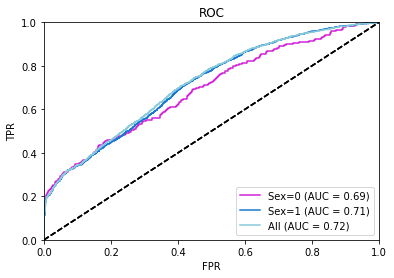

In [ ]:
#Code for computing the AUCROC

from sklearn.metrics import roc_auc_score, roc_curve, auc


def getAUC(truth, pred):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    return auc(fpr, tpr)


def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

#Add code below to subset rows by protected attribute


aucc = getAUC(df_test[YFeatures], clf.predict_proba(df_test[XFeatures])[::,1])
aucc_sex_1 = getAUC(df_sex_1[YFeatures], clf.predict_proba(df_sex_1[XFeatures])[::,1])
aucc_sex_0 = getAUC(df_sex_0[YFeatures], clf.predict_proba(df_sex_0[XFeatures])[::,1])
print(aucc, "General")
print(aucc_sex_1, "Sex1")
print(aucc_sex_0, "Sex0")

#Add code below to make the plot


plotAUC(df_sex_0[YFeatures], clf.predict_proba(df_sex_0[XFeatures])[::,1],"Sex=0" )
plotAUC(df_sex_1[YFeatures], clf.predict_proba(df_sex_1[XFeatures])[::,1],"Sex=1" )
plotAUC(df_test[YFeatures], clf.predict_proba(df_test[XFeatures])[::,1],"All" )

#### Assessing algorithmic fairness (5 points)

8\. Algorithmic Fairness metrics (2 points)

Pick a fairness metric to apply to the income prediction task and your selected protected attribute. Explain why you selected this metric.

$\color{blue}{\text{ Place your answer here.}}$

I select Equalized odds (true positive rate), which determines the FPR and yields the proportion of low-income earners who are predicted to have high incomes. Similar to equal opportunity, this interpretation argues for equal TPRs. The FPRs are now also required to be equal. As a result, equalized odds can be seen as a more strict definition of fairness.

9\. Compute the chosen metric for your protected attribute. Hint: this will require you to first find the threshold wiith the best when predicting on the entire data, and then computing the TPR/FPR or other necessary parameters at that threshold for each value of the protected attribute. (2 points)

There are many ways we could locate the threshold with the optimal balance between the false positive rate (FPR) and true positive rate (TPR).

As a reminder, the TPR is called the Sensitivity. The inverse of the false-positive rate (1-FPR) is called the Specificity.

<center>Sensitivity = $\frac{TP}{TP + FN}$
Specificity = $\frac{TN}{FP + TN}$</center>

where:

<center>Sensitivity = TPR and Specificity = 1 – FPR</center>

The Geometric Mean or g-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

<center>g-mean = $\sqrt{Sensitivity * Specificity}$ </center>



In [ ]:
#pr, tpr, thresholds = roc_curve(truth, pred)

def fairness_metrics(truth, pred, lab):
  print('For: ', lab)
  fpr, tpr, thresholds = roc_curve(truth, pred)
  sensitivity = tpr
  specificity = 1-fpr
  g_mean = np.sqrt(tpr * (1-fpr))
  #print(g_mean)
  ix = np.argmax(g_mean)
  print('Gmeans = ', g_mean[ix])
  print('Threshold = ', thresholds[ix])

In [ ]:
#Place code here


fairness_metrics(df_sex_0[YFeatures], clf.predict_proba(df_sex_0[XFeatures])[::,1],"Sex=0" )
fairness_metrics(df_sex_1[YFeatures], clf.predict_proba(df_sex_1[XFeatures])[::,1],"Sex=1" )
fairness_metrics(df_test[YFeatures], clf.predict_proba(df_test[XFeatures])[::,1],"All" )




For:  Sex=0
Gmeans =  0.6214318938035891
Threshold =  0.21500714441999275
For:  Sex=1
Gmeans =  0.6434567465894554
Threshold =  0.20242534596445422
For:  All
Gmeans =  0.647940894859555
Threshold =  0.20258825360766322


10\. Is there a disparity? How can we interpret its magnitude? Is such a disparity a bad thing/avoidable? (1 point)

$\color{blue}{\text{ Place your answer here.}}$


There is slight disparity in the dataset for the sex of the individual. We can interpret the magitude as the percentage difference of the total values of Gmeans and threshold. This much disparity is not necessarily a bad thing, but it can be avoided with a more diverse dataset with equal amounts of male and female values.